In [1]:
%matplotlib inline
import pandas as pd
import requests
import numpy as np

import roc_results

In [2]:
response = requests.get('http://localhost:8000/result/')
rec = []
for r in response.json():
    svm = r.get('algorithm').get('svm')
    if svm.get('kernel') == 'sigmoid':
        rec.append({
            'kernel': svm.get('kernel'),
            'c': svm.get('c'),
            'gamma': svm.get('gamma'),
            'coef0': svm.get('coef0'),
            'roc_auc_score': r.get('roc_auc_score'),
            'stock': r.get('stock')
        })
df = pd.DataFrame(rec)

In [3]:
log_res = []
for i, row in df.iterrows():
    log_res.append(roc_results.results.get(row['stock']))
df['log_res'] = log_res
df['diff'] = df['roc_auc_score'] - log_res

In [4]:
print(len(df['stock'].unique()))
print(len(df[df['log_res'] <= df['roc_auc_score']]['stock'].unique()))

98
90


In [5]:
df[df['log_res'] <= df['roc_auc_score']]

,c,coef0,gamma,kernel,roc_auc_score,stock,log_res,diff
74,0.001,10.0000,100.0000,sigmoid,0.584521,11399,0.582127,2.394206e-03
81,0.001,10.0000,1000.0000,sigmoid,0.582531,11399,0.582127,4.038827e-04
82,0.001,100.0000,1000.0000,sigmoid,0.587768,11399,0.582127,5.640827e-03
388,10.000,1.0000,0.0010,sigmoid,0.572613,2645,0.572117,4.960317e-04
423,100.000,1.0000,0.0001,sigmoid,0.572613,2645,0.572117,4.960317e-04
578,0.001,10.0000,100.0000,sigmoid,0.548774,9069,0.548773,1.371150e-06
586,0.001,100.0000,1000.0000,sigmoid,0.548773,9069,0.548773,3.330669e-16
819,0.001,0.0000,10.0000,sigmoid,0.547059,9063,0.541335,5.723862e-03
820,0.001,0.0001,10.0000,sigmoid,0.547059,9063,0.541335,5.723862e-03
821,0.001,0.0010,10.0000,sigmoid,0.547059,9063,0.541335,5.723862e-03


In [6]:
df.groupby('stock').aggregate({'roc_auc_score': np.max})

,roc_auc_score
stock,
10166,0.564622
10470,0.598329
10484,0.555384
10508,0.568278
10795,0.605841
1080,0.607707
10887,0.549857
11038,0.592981
1113,0.573987


In [7]:
df_bests = df.loc[df.groupby('stock')['roc_auc_score'].idxmax()]
# I would like to have all of them
df_bests

,c,coef0,gamma,kernel,roc_auc_score,stock,log_res,diff
2097,0.001,10.0,1000.0000,sigmoid,0.564622,10166,0.556248,0.008374
13429,0.001,1.0,100.0000,sigmoid,0.598329,10470,0.595373,0.002956
19730,0.001,10.0,100.0000,sigmoid,0.555384,10484,0.545468,0.009916
10154,0.001,10.0,100.0000,sigmoid,0.568278,10508,0.567335,0.000944
7528,1000.000,1.0,0.0010,sigmoid,0.605841,10795,0.607709,-0.001869
20494,0.001,100.0,1000.0000,sigmoid,0.607707,1080,0.594769,0.012938
7893,0.001,10.0,1000.0000,sigmoid,0.549857,10887,0.549123,0.000734
20993,0.001,0.0,1000.0000,sigmoid,0.592981,11038,0.567653,0.025328
7137,0.001,10.0,1000.0000,sigmoid,0.573987,1113,0.569651,0.004336
8284,1000.000,1.0,0.0010,sigmoid,0.593937,11234,0.593071,0.000866


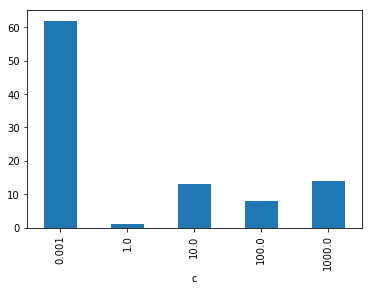

In [8]:
df_bests.groupby('c')['c'].count().plot(kind='bar')

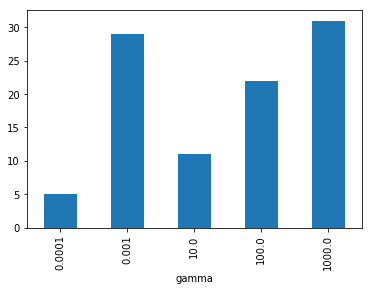

In [9]:
df_bests.groupby('gamma')['gamma'].count().plot(kind='bar')

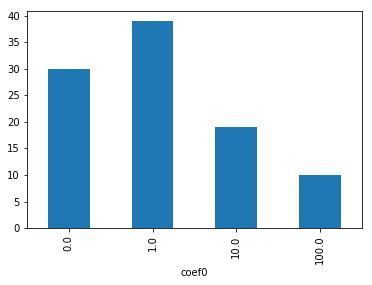

In [10]:
df_bests.groupby('coef0')['coef0'].count().plot(kind='bar')

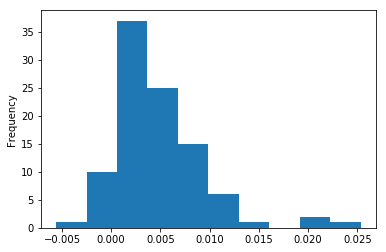

In [11]:
df_bests['diff'].plot(kind='hist')

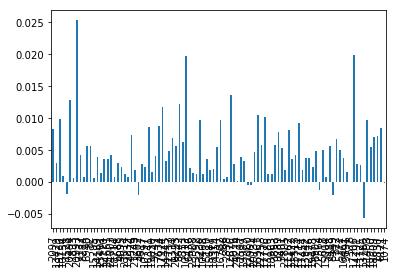

In [12]:
df_bests['diff'].plot(kind='bar')

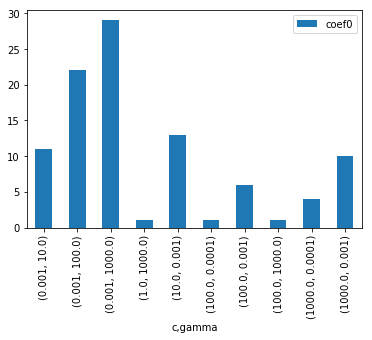

In [13]:
df_bests.groupby(['c', 'gamma'])[['coef0']].count().plot(kind='bar')

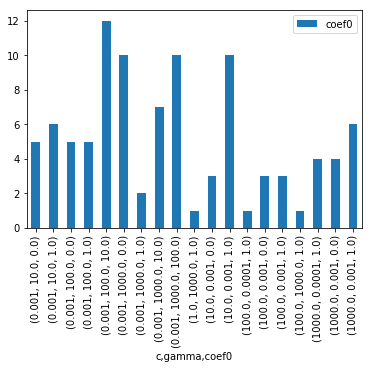

In [14]:
df_bests.groupby(['c', 'gamma', 'coef0'])[['coef0']].count().plot(kind='bar')

In [15]:
df.sort_values(by='diff')

,c,coef0,gamma,kernel,roc_auc_score,stock,log_res,diff
15787,10.000,0.0010,1000.0000,sigmoid,0.433037,2197,0.614852,-0.181815
15788,10.000,1.0000,1000.0000,sigmoid,0.433037,2197,0.614852,-0.181815
15785,10.000,0.0000,1000.0000,sigmoid,0.433037,2197,0.614852,-0.181815
15786,10.000,0.0001,1000.0000,sigmoid,0.433037,2197,0.614852,-0.181815
15870,1000.000,0.0001,1000.0000,sigmoid,0.433049,2197,0.614852,-0.181803
15871,1000.000,0.0010,1000.0000,sigmoid,0.433049,2197,0.614852,-0.181803
15869,1000.000,0.0000,1000.0000,sigmoid,0.433049,2197,0.614852,-0.181803
15830,100.000,1.0000,1000.0000,sigmoid,0.433729,2197,0.614852,-0.181123
15829,100.000,0.0010,1000.0000,sigmoid,0.433729,2197,0.614852,-0.181123
15828,100.000,0.0001,1000.0000,sigmoid,0.433729,2197,0.614852,-0.181123
